## Importando Arquivo

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data_base = pd.read_csv(path)

data_base[['Moeda', 'Valor_Imovel', 'Tipo_de_Contrato']] = data_base['Valor'].str.split(expand = True)
data_base_2 = data_base[data_base['Tipo_de_Contrato'].isnull()]
data_base_2['Valor_Imovel_float'] = data_base_2['Valor_Imovel'].str.replace('.', '').astype(float)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Aprendendo e Testando

In [3]:
data_base_2.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas         Valor Moeda Valor_Imovel  \
0        4          8      6  R$ 7.000.000    R$    7.000.000   
1        4          4      4  R$ 3.700.000    R$    3.700.000   
2        4          3      2    R$ 380.000    R$      380.000   
3        3          2      4    R$ 685.000    R$      685.000   
4        3          2      2    R$ 540.000    R$      540.000   

  Tipo_de_Contrato  Valor_Imovel_float  
0             None          7000000.00  
1             None          3700000.00  
2             None           380000.00  
3             None           685000.00  
4             None           540000.00

Calculando o valor do metro quadrado para cada imóvel.

In [4]:
data_base_2['Valor_m2'] = data_base_2['Valor_Imovel_float'] / data_base_2['Metragem']
data_base_2['Valor_m2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       7000.00
1       7459.68
2       3040.00
3       2209.68
4       5400.00
          ...  
10002   5617.98
10003   7000.00
10004   3801.65
10005   5121.95
10007   2213.11
Name: Valor_m2, Length: 9156, dtype: float64

Agrupando por bairro e tirando a média.

In [5]:
data_base_2.groupby(['Bairro']).mean()

Metragem  Quartos  Banheiros  Vagas  Valor_Imovel_float  \
Bairro                                                                       
Aclimação            246.16     3.27       3.04   2.91          1763200.01   
Alto da Boa Vista    418.88     4.12       5.12   4.62          2391250.00   
Alto da Lapa         299.25     3.15       3.85   4.00          2083168.75   
Alto da Mooca        270.05     3.30       2.60   3.65          1184170.00   
Alto de Pinheiros    429.85     3.94       4.83   4.95          4782698.96   
...                     ...      ...        ...    ...                 ...   
Vila Água Funda      152.20     2.60       2.20   2.60           652000.00   
Água Branca          173.58     3.08       3.25   2.25          1226500.00   
Água Fria            165.42     2.83       3.42   2.50           927083.33   
Água Funda           139.00     3.00       2.50   2.00           545000.00   
Água Rasa            186.17     2.67       2.00   3.67           716166.67   

                   Valor_m2  
Bairro                       
Aclimação           7656.17  
Alto da Boa Vista   5849.57  
Alto da Lapa        7606.73  
Alto da Mooca       5691.74  
Alto de Pinheiros  11269.98  
...                     ...  
Vila Água Funda     4467.13  
Água Branca         7269.11  
Água Fria           5841.10  
Água Funda          3876.86  
Água Rasa           4509.61  

[697 rows x 6 columns]

Obtendo a soma dos valores agrupados pelo bairro.

In [6]:
data_base_2.groupby(['Bairro']).sum()

Metragem  Quartos  Banheiros  Vagas  Valor_Imovel_float  \
Bairro                                                                       
Aclimação             19447      258        240    230        139292801.00   
Alto da Boa Vista      3351       33         41     37         19130000.00   
Alto da Lapa          23940      252        308    320        166653500.00   
Alto da Mooca          5401       66         52     73         23683400.00   
Alto de Pinheiros    158616     1453       1782   1827       1764815915.00   
...                     ...      ...        ...    ...                 ...   
Vila Água Funda         761       13         11     13          3260000.00   
Água Branca            2083       37         39     27         14718000.00   
Água Fria              1985       34         41     30         11125000.00   
Água Funda              278        6          5      4          1090000.00   
Água Rasa              1117       16         12     22          4297000.00   

                    Valor_m2  
Bairro                        
Aclimação          604837.39  
Alto da Boa Vista   46796.55  
Alto da Lapa       608538.25  
Alto da Mooca      113834.80  
Alto de Pinheiros 4158622.61  
...                      ...  
Vila Água Funda     22335.64  
Água Branca         87229.37  
Água Fria           70093.25  
Água Funda           7753.73  
Água Rasa           27057.65  

[697 rows x 6 columns]

Uma maneira mais correta para obter o valor do metro quadrado. Para isso, eu obtenho a soma de todos os valores de imóveis e de metragens de cada bairro e após isso eu divido as somas de valor pelas somas da metragem.

In [7]:
district_value = data_base_2.groupby(['Bairro']).sum()
district_value['Valor_bairro_m2'] = district_value['Valor_Imovel_float'] / district_value['Metragem']
district_value

Metragem  Quartos  Banheiros  Vagas  Valor_Imovel_float  \
Bairro                                                                       
Aclimação             19447      258        240    230        139292801.00   
Alto da Boa Vista      3351       33         41     37         19130000.00   
Alto da Lapa          23940      252        308    320        166653500.00   
Alto da Mooca          5401       66         52     73         23683400.00   
Alto de Pinheiros    158616     1453       1782   1827       1764815915.00   
...                     ...      ...        ...    ...                 ...   
Vila Água Funda         761       13         11     13          3260000.00   
Água Branca            2083       37         39     27         14718000.00   
Água Fria              1985       34         41     30         11125000.00   
Água Funda              278        6          5      4          1090000.00   
Água Rasa              1117       16         12     22          4297000.00   

                    Valor_m2  Valor_bairro_m2  
Bairro                                         
Aclimação          604837.39          7162.69  
Alto da Boa Vista   46796.55          5708.74  
Alto da Lapa       608538.25          6961.30  
Alto da Mooca      113834.80          4385.00  
Alto de Pinheiros 4158622.61         11126.34  
...                      ...              ...  
Vila Água Funda     22335.64          4283.84  
Água Branca         87229.37          7065.77  
Água Fria           70093.25          5604.53  
Água Funda           7753.73          3920.86  
Água Rasa           27057.65          3846.91  

[697 rows x 7 columns]

Obtenho todas as médias dos itens de Vila Mariana.

In [8]:
data_base_2.groupby(['Bairro']).mean().loc['Vila Mariana']

Metragem                 231.24
Quartos                    3.39
Banheiros                  3.24
Vagas                      2.95
Valor_Imovel_float   1771159.76
Valor_m2                7913.15
Name: Vila Mariana, dtype: float64

Obtenho os 10 itens da coluna bairro que mais apareceram.

In [9]:
data_base_2['Bairro'].value_counts()[:10].index

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

Da soma dos agrupamentos por bairro, eu seleciono o bairro Vila Mariana.

In [10]:
district_value.loc['Vila Mariana']

Metragem                 39079.00
Quartos                    573.00
Banheiros                  547.00
Vagas                      499.00
Valor_Imovel_float   299326000.00
Valor_m2               1337323.16
Valor_bairro_m2           7659.51
Name: Vila Mariana, dtype: float64

Obtenho o valor do metro quadrado em Vila Mariana.

In [11]:
district_value.loc['Vila Mariana']['Valor_bairro_m2']

7659.510222881855

Obtenho o valor do metro quadrado em todos os bairros.

In [12]:
district_value['Valor_bairro_m2']

Bairro
Aclimação            7162.69
Alto da Boa Vista    5708.74
Alto da Lapa         6961.30
Alto da Mooca        4385.00
Alto de Pinheiros   11126.34
                      ...   
Vila Água Funda      4283.84
Água Branca          7065.77
Água Fria            5604.53
Água Funda           3920.86
Água Rasa            3846.91
Name: Valor_bairro_m2, Length: 697, dtype: float64

Também obtenho o valor do metro quadrado em Vila Mariana, porém agora eu não preciso usar o loc.

In [13]:
district_value['Valor_bairro_m2']['Vila Mariana']

7659.510222881855

Volto a organizar o Data Frame por índices, antes disso a coluna bairro estava atuando como uma especie de índice, o que acabava por limitar muitas das ações que poderiam ser realizadas. Agora, após os índices serem resetados, é como se ela voltasse a ser um Data Frame em si.

In [14]:
district_value.reset_index(inplace = True)  # O inplace faz com que eu não precise dizer que a variável é igual ao novo valor (district_value = district_value.reset_index())
district_value

Bairro  Metragem  Quartos  Banheiros  Vagas  \
0            Aclimação     19447      258        240    230   
1    Alto da Boa Vista      3351       33         41     37   
2         Alto da Lapa     23940      252        308    320   
3        Alto da Mooca      5401       66         52     73   
4    Alto de Pinheiros    158616     1453       1782   1827   
..                 ...       ...      ...        ...    ...   
692    Vila Água Funda       761       13         11     13   
693        Água Branca      2083       37         39     27   
694          Água Fria      1985       34         41     30   
695         Água Funda       278        6          5      4   
696          Água Rasa      1117       16         12     22   

     Valor_Imovel_float   Valor_m2  Valor_bairro_m2  
0          139292801.00  604837.39          7162.69  
1           19130000.00   46796.55          5708.74  
2          166653500.00  608538.25          6961.30  
3           23683400.00  113834.80          4385.00  
4         1764815915.00 4158622.61         11126.34  
..                  ...        ...              ...  
692          3260000.00   22335.64          4283.84  
693         14718000.00   87229.37          7065.77  
694         11125000.00   70093.25          5604.53  
695          1090000.00    7753.73          3920.86  
696          4297000.00   27057.65          3846.91  

[697 rows x 8 columns]

Crio um gráfico de barras, porém como não filtrei quais bairros eu quero, acaba que todos os bairros aparecem.

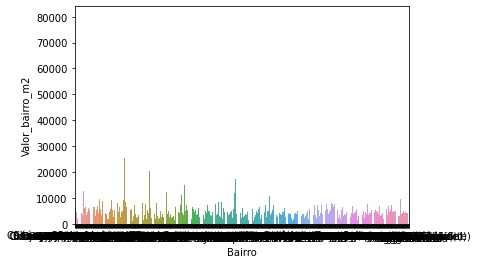

In [15]:
barplot_1 = sns.barplot(data = district_value, x = 'Bairro', y = 'Valor_bairro_m2')
plt.show()

Dentre os bairros, eu organizo eles para deixar aqueles que possuem o maior valor valor do metro quadrado no topo, após isso, eu seleciono os 10 maiores.

In [16]:
top_10_m2 = district_value.sort_values(by = ['Valor_bairro_m2'], ascending = False).head(10)
top_10_m2

Bairro  Metragem  Quartos  Banheiros  Vagas  \
527           Vila Guaca        10        3          2      2   
103       Jardim América     76911      481        605    848   
277        Jardim Teresa      1945       15         18     18   
155        Jardim Europa    118898      795        993   1056   
597  Vila Nova Conceição     27837      277        314    301   
334   Morro dos Ingleses      1400       12         10     26   
192     Jardim Luzitânia     43422      307        427    376   
227      Jardim Paulista    130283     1028       1231   1171   
228    Jardim Paulistano     51468      494        541    529   
421            São Judas      1334       15         17     18   

     Valor_Imovel_float   Valor_m2  Valor_bairro_m2  
527           800000.00   80000.00         80000.00  
103       1954884000.00 2866540.12         25417.48  
277         44510000.00   52396.69         22884.32  
155       2414172900.00 4192164.45         20304.57  
597        489265000.00 1638105.15         17576.07  
334         24300000.00   35247.09         17357.14  
192        736485000.00 1441482.10         16961.10  
227       2136081000.00 4279262.19         16395.70  
228        767570001.00 2009338.16         14913.54  
421         19862000.00   41067.17         14889.06

Bairros com os maiores valores de m2:

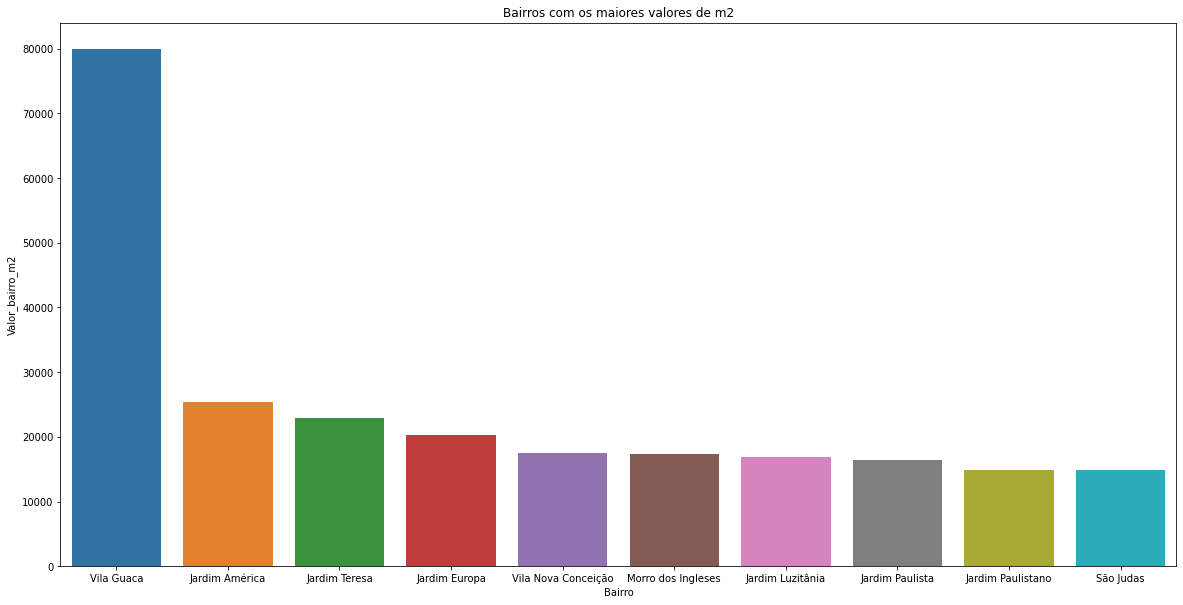

In [17]:
plt.figure(figsize = (20, 10))
barplot_2 = sns.barplot(data = top_10_m2, x = 'Bairro', y = 'Valor_bairro_m2')
barplot_2.set_title('Bairros com os maiores valores de m2')
plt.show()

Valor do m2 nos bairros que mais aparecem:

Seleciono os 10 bairros que mais aparecem na base de dados original.

In [18]:
top_10_district = data_base_2['Bairro'].value_counts()[:10].index
top_10_district

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [19]:
district_value

Bairro  Metragem  Quartos  Banheiros  Vagas  \
0            Aclimação     19447      258        240    230   
1    Alto da Boa Vista      3351       33         41     37   
2         Alto da Lapa     23940      252        308    320   
3        Alto da Mooca      5401       66         52     73   
4    Alto de Pinheiros    158616     1453       1782   1827   
..                 ...       ...      ...        ...    ...   
692    Vila Água Funda       761       13         11     13   
693        Água Branca      2083       37         39     27   
694          Água Fria      1985       34         41     30   
695         Água Funda       278        6          5      4   
696          Água Rasa      1117       16         12     22   

     Valor_Imovel_float   Valor_m2  Valor_bairro_m2  
0          139292801.00  604837.39          7162.69  
1           19130000.00   46796.55          5708.74  
2          166653500.00  608538.25          6961.30  
3           23683400.00  113834.80          4385.00  
4         1764815915.00 4158622.61         11126.34  
..                  ...        ...              ...  
692          3260000.00   22335.64          4283.84  
693         14718000.00   87229.37          7065.77  
694         11125000.00   70093.25          5604.53  
695          1090000.00    7753.73          3920.86  
696          4297000.00   27057.65          3846.91  

[697 rows x 8 columns]

Na variável com a soma de todos os valores dos bairros, eu seleciono apenas os bairros que mais aparessem.

In [20]:
top_10_district_value = district_value.query('Bairro in @top_10_district')
top_10_district_value

Bairro  Metragem  Quartos  Banheiros  Vagas  \
4    Alto de Pinheiros    158616     1453       1782   1827   
19   Brooklin Paulista     70002      778        862    832   
57       Cidade Jardim    132220      789       1008   1172   
155      Jardim Europa    118898      795        993   1056   
168     Jardim Guedala    972212     1443       2027   2161   
187      Jardim Leonor     97141      697        941    902   
227    Jardim Paulista    130283     1028       1231   1171   
338           Pacaembu    100285      774        889   1028   
396  Planalto Paulista     59250      636        768    713   
564      Vila Madalena     66250      739        786    712   

     Valor_Imovel_float   Valor_m2  Valor_bairro_m2  
4         1764815915.00 4158622.61         11126.34  
19         475796789.00 1627341.87          6796.90  
57        1164210900.00 1635692.98          8805.10  
155       2414172900.00 4192164.45         20304.57  
168       1801165587.00 2833882.79          1852.65  
187        646326369.00 1115858.80          6653.49  
227       2136081000.00 4279262.19         16395.70  
338        867956500.00 1753672.28          8654.90  
396        374907000.00 1186380.95          6327.54  
564        583253030.00 1792770.40          8803.82

Crio um gráfico de barras com o 10 bairros que mais aparessem.

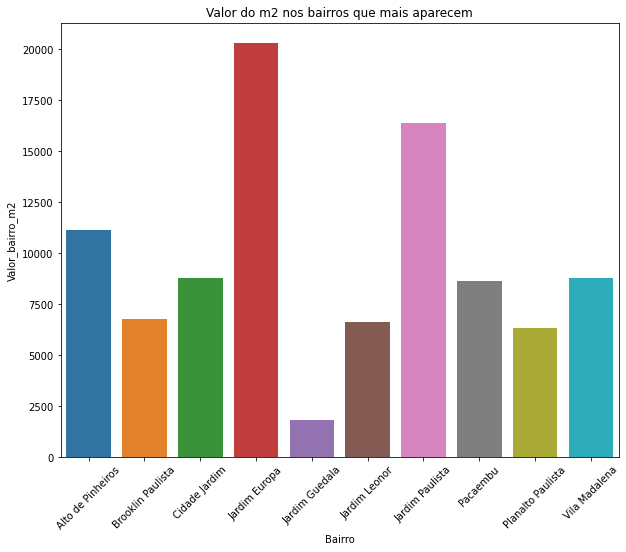

In [21]:
plt.figure(figsize = (10, 8))
barplot_3 = sns.barplot(data = top_10_district_value, x = 'Bairro', y = 'Valor_bairro_m2')
barplot_3.set_title('Valor do m2 nos bairros que mais aparecem')
barplot_3.tick_params(axis = 'x', rotation = 45)
plt.show()

Boxplots:

Crio um box plot do valor do imóvel nos 10 bairros que mais aparessem. Lembrando que a consulta é feita na base de dados original para selecionar todos os casos que ocorrem em cada um dos bairros do top 10.

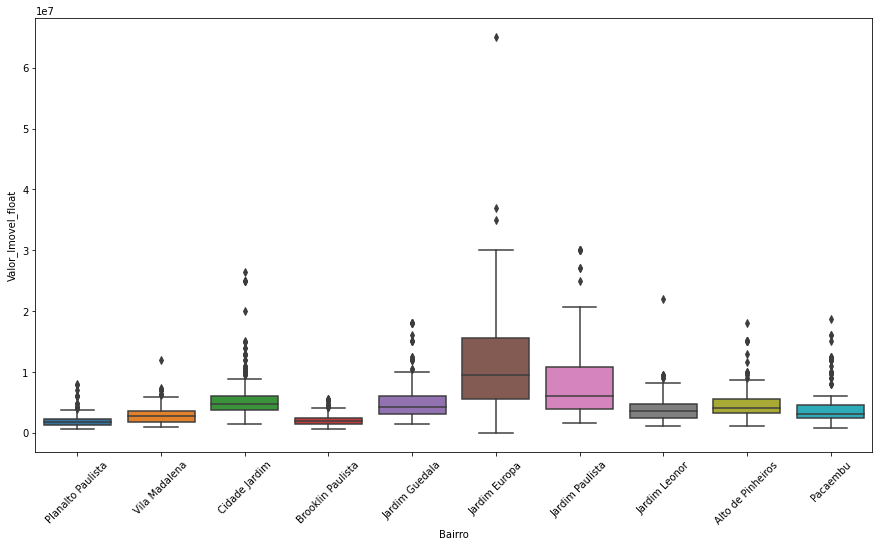

In [22]:
plt.figure(figsize = (15, 8))
boxplot_1 = sns.boxplot(data = data_base_2.query('Bairro in @top_10_district'), x = 'Bairro', y = 'Valor_Imovel_float')
boxplot_1.tick_params(axis = 'x', rotation = 45)
plt.show()

Crio um box plot que associa o bairro com a metragem, sendo que essa metragem precisa ser inferior a 30000 metros.

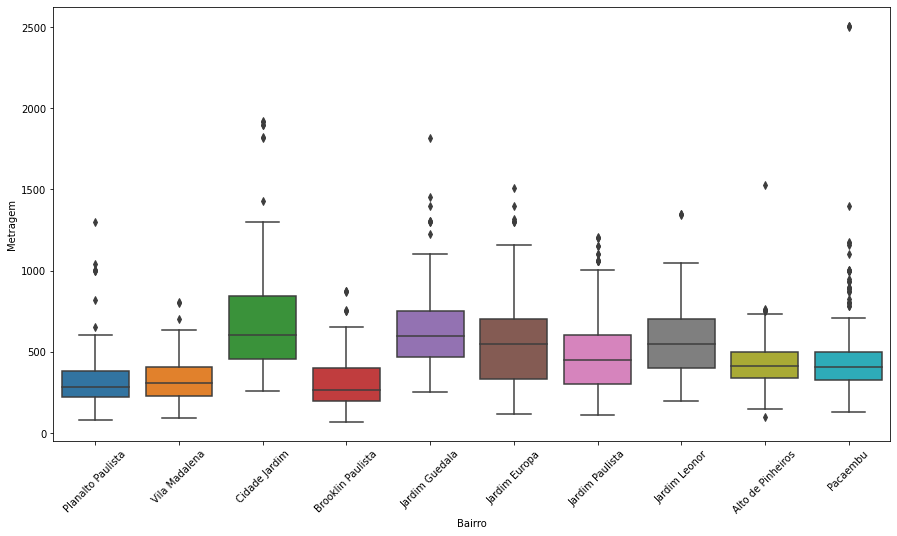

In [23]:
plt.figure(figsize = (15, 8))
boxplot_2 = sns.boxplot(data = data_base_2.query('Bairro in @top_10_district & Metragem < 30000'), x = 'Bairro', y = 'Metragem')
boxplot_2.tick_params(axis = 'x', rotation = 45)
plt.show()

Dados do IBGE de forma completamente desorganizada.

In [24]:
url_ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
ibge_data = pd.read_csv(url_ibge)
ibge_data

Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
355030801000001;3;"Regi�o Sudeste";35;"S�o Paul... 01;2 32;2091 32;8532451           78;2164 55;8673276 78;1227 41;4285771 99;1713 75;5152087                                              86.00                                                                                                                                                                                                                                                                                                     
355030801000002;3;"Regi�o Sudeste";35;"S�o Paul... 98;2 09;1650 09;3983441           31;1717 44;4030519 99;1045 78;2572133 32;1468 08;2991546                                              94.00                                                                                                                                                                                                                                                                                                     
355030801000003;3;"Regi�o Sudeste";35;"S�o Paul... 31;3 08;1280 43;5474593           06;2349 53;7553913 02;902  97;2735492 52;1786 79;3837674                                              74.00                                                                                                                                                                                                                                                                                                     
355030801000004;3;"Regi�o Sudeste";35;"S�o Paul... 16;2 26;1119 59;3572955           1;1859  13;4567289 5;869   09;2122409 02;1567 41;2735383                                              24.00                                                                                                                                                                                                                                                                                                     
355030801000005;3;"Regi�o Sudeste";35;"S�o Paul... 14;2 35;1416 9;2240207            58;1581 66;2240109 39;917  71;1570047 75;1356 35;1725877                                              85.00                                                                                                                                                                                                                                                                                                     
...                                                                                                                                                                                          ...                                                                                                                                                                                                                                                                                                     
355030896000243;3;"Regi�o Sudeste";35;"S�o Paul... 5;2  61;772  09;168751            1;814   52;143188  21;467  46;191332  48;699  95;123399                                                8.00                                                                                                                                                                                                                                                                                                     
355030896000244;3;"Regi�o Sudeste";35;"S�o Paul... 87;2 49;692  5;239941             27;812  93;182516  2;439   33;194034  99;702  1;124952                                                38.00                                                               

## Desafios 🧐🤯😎:

- Tentar vincular dados do IBGE com os dados de imóveis
- Tratar os outliers e comparar com os resultados
- Agrupar por mais de uma categoria e realizar as análises
- Orgaize o colab para deixar com cara de projeto

#### Desafio 1: Tentar vincular dados do IBGE com os dados de imóveis.

#### Desafio 2: Tratar os outliers e comparar com os resultados.

#### Desafio 3: Agrupar por mais de uma categoria e realizar as análises.

Percebe-se que a média do valor dos imóveis, em grande parte dos casos, sobe de maneira linear ao se aumentar o número dos quartos.

In [28]:
data_base_2.groupby(['Bairro', 'Quartos']).mean()

level_0   index  Metragem  Banheiros  Vagas  \
Bairro     Quartos                                                
Aclimação  2        3286.00 3656.50    193.17       1.83   2.00   
           3        4075.30 4515.85    218.42       2.83   2.77   
           4        4689.33 5187.40    346.80       3.40   3.80   
           5        5066.67 5612.67    335.00       6.67   3.33   
           6        4698.50 5211.50    252.50       4.00   2.00   
...                     ...     ...       ...        ...    ...   
Água Fria  3        5720.50 6293.50    212.17       4.17   2.50   
           4        3571.00 3960.50    221.00       4.50   3.50   
Água Funda 3        7239.00 7970.50    139.00       2.50   2.00   
Água Rasa  2        8629.50 9453.50    213.50       1.50   3.50   
           3        6863.75 7517.75    172.50       2.25   3.75   

                    Valor_Imovel_float  Valor_m2  
Bairro     Quartos                                
Aclimação  2                1281666.67   6628.22  
           3                1610245.30   7722.63  
           4                2318653.33   7845.11  
           5                2533333.33   7574.77  
           6                1940000.00   7683.92  
...                                ...       ...  
Água Fria  3                1162500.00   5782.78  
           4                1285000.00   5860.95  
Água Funda 3                 545000.00   3876.86  
Água Rasa  2                 637500.00   4695.49  
           3                 755500.00   4416.67  

[1433 rows x 7 columns]

In [37]:
data_base_2.groupby(['Bairro', 'Quartos']).mean().tail(10)

level_0   index  Metragem  Banheiros  Vagas  \
Bairro          Quartos                                                
Vila Água Funda 5        8356.00 9167.00    190.00       3.00   4.00   
Água Branca     2        3011.50 3339.00     94.50       2.50   1.00   
                3        2951.00 3265.29    162.71       3.29   2.00   
                4        8516.00 9333.00    251.67       3.67   3.67   
Água Fria       2        8429.25 9230.50     67.50       1.75   2.00   
                3        5720.50 6293.50    212.17       4.17   2.50   
                4        3571.00 3960.50    221.00       4.50   3.50   
Água Funda      3        7239.00 7970.50    139.00       2.50   2.00   
Água Rasa       2        8629.50 9453.50    213.50       1.50   3.50   
                3        6863.75 7517.75    172.50       2.25   3.75   

                         Valor_Imovel_float  Valor_m2  
Bairro          Quartos                                
Vila Água Funda 5                 650000.00   3421.05  
Água Branca     2                 650000.00   6915.23  
                3                1214000.00   7757.66  
                4                1640000.00   6365.10  
Água Fria       2                 395000.00   5918.67  
                3                1162500.00   5782.78  
                4                1285000.00   5860.95  
Água Funda      3                 545000.00   3876.86  
Água Rasa       2                 637500.00   4695.49  
                3                 755500.00   4416.67

Percebe-se que quando referente a soma, os número de quartos não é muito significante, sendo a metragem a coluna que mais se sobressai.

In [35]:
data_base_2.groupby(['Bairro', 'Quartos']).sum()

level_0   index  Metragem  Banheiros  Vagas  \
Bairro     Quartos                                                
Aclimação  2          19716   21939      1159         11     12   
           3         215991  239340     11576        150    147   
           4          70340   77811      5202         51     57   
           5          15200   16838      1005         20     10   
           6           9397   10423       505          8      4   
...                     ...     ...       ...        ...    ...   
Água Fria  3          34323   37761      1273         25     15   
           4           7142    7921       442          9      7   
Água Funda 3          14478   15941       278          5      4   
Água Rasa  2          17259   18907       427          3      7   
           3          27455   30071       690          9     15   

                    Valor_Imovel_float  Valor_m2  
Bairro     Quartos                                
Aclimação  2                7690000.00  39769.30  
           3               85343001.00 409299.25  
           4               34779800.00 117676.67  
           5                7600000.00  22724.32  
           6                3880000.00  15367.84  
...                                ...       ...  
Água Fria  3                6975000.00  34696.67  
           4                2570000.00  11721.90  
Água Funda 3                1090000.00   7753.73  
Água Rasa  2                1275000.00   9390.98  
           3                3022000.00  17666.67  

[1433 rows x 7 columns]

In [39]:
data_base_2.groupby(['Bairro', 'Quartos']).sum().tail(21)

level_0  index  Metragem  Banheiros  Vagas  \
Bairro            Quartos                                               
Vila das Mercês   2           8950   9789        70          1      2   
                  3          34482  37869       748         15     18   
                  4           7122   7850       161          1      8   
Vila do Bosque    5          38758  42776      1658         30     18   
Vila do Castelo   2           5844   6457       137          2      2   
                  3          33278  36671      1676         12     20   
Vila do Encontro  2          20280  22343       635          5      8   
                  3          12488  13759       355          5      4   
                  4          13144  14561       760          6      9   
Vila dos Remédios 3          11641  12826       395          7     10   
Vila Água Funda   2          20054  22095       571          8      9   
                  5           8356   9167       190          3      4   
Água Branca       2           6023   6678       189          5      2   
                  3          20657  22857      1139         23     14   
                  4          25548  27999       755         11     11   
Água Fria         2          33717  36922       270          7      8   
                  3          34323  37761      1273         25     15   
                  4           7142   7921       442          9      7   
Água Funda        3          14478  15941       278          5      4   
Água Rasa         2          17259  18907       427          3      7   
                  3          27455  30071       690          9     15   

                           Valor_Imovel_float  Valor_m2  
Bairro            Quartos                                
Vila das Mercês   2                 250000.00   3571.43  
                  3                3470000.00  23654.71  
                  4                 850000.00   5279.50  
Vila do Bosque    5                7279900.00  26342.83  
Vila do Castelo   2                 565000.00   4124.09  
                  3                3515000.00  12961.30  
Vila do Encontro  2                2064000.00  11253.44  
                  3                1600000.00   8878.21  
                  4                3848000.00  14011.69  
Vila dos Remédios 3                1740000.00  13639.55  
Vila Água Funda   2                2610000.00  18914.59  
                  5                 650000.00   3421.05  
Água Branca       2                1300000.00  13830.46  
                  3                8498000.00  54303.62  
                  4                4920000.00  19095.30  
Água Fria         2                1580000.00  23674.68  
                  3                6975000.00  34696.67  
                  4                2570000.00  11721.90  
Água Funda        3                1090000.00   7753.73  
Água Rasa         2                1275000.00   9390.98  
                  3                3022000.00  17666.67

Percebe-se ambiguidade nos valores das somas dos metros quadrados para com o aumento de quartos nos bairros.

In [33]:
group_by_district_and_rooms = data_base_2.groupby(['Bairro', 'Quartos']).sum()
group_by_district_and_rooms.reset_index(inplace = True)
group_by_district_and_rooms['Valor_quartos_bairro_m2'] = group_by_district_and_rooms['Valor_Imovel_float'] / group_by_district_and_rooms['Metragem']
group_by_district_and_rooms

Bairro  Quartos  level_0   index  Metragem  Banheiros  Vagas  \
0      Aclimação        2    19716   21939      1159         11     12   
1      Aclimação        3   215991  239340     11576        150    147   
2      Aclimação        4    70340   77811      5202         51     57   
3      Aclimação        5    15200   16838      1005         20     10   
4      Aclimação        6     9397   10423       505          8      4   
...          ...      ...      ...     ...       ...        ...    ...   
1428   Água Fria        3    34323   37761      1273         25     15   
1429   Água Fria        4     7142    7921       442          9      7   
1430  Água Funda        3    14478   15941       278          5      4   
1431   Água Rasa        2    17259   18907       427          3      7   
1432   Água Rasa        3    27455   30071       690          9     15   

      Valor_Imovel_float  Valor_m2  Valor_quartos_bairro_m2  
0             7690000.00  39769.30                  6635.03  
1            85343001.00 409299.25                  7372.41  
2            34779800.00 117676.67                  6685.85  
3             7600000.00  22724.32                  7562.19  
4             3880000.00  15367.84                  7683.17  
...                  ...       ...                      ...  
1428          6975000.00  34696.67                  5479.18  
1429          2570000.00  11721.90                  5814.48  
1430          1090000.00   7753.73                  3920.86  
1431          1275000.00   9390.98                  2985.95  
1432          3022000.00  17666.67                  4379.71  

[1433 rows x 10 columns]

In [40]:
group_by_district_and_rooms.tail(21)

Bairro  Quartos  level_0  index  Metragem  Banheiros  Vagas  \
1412    Vila das Mercês        2     8950   9789        70          1      2   
1413    Vila das Mercês        3    34482  37869       748         15     18   
1414    Vila das Mercês        4     7122   7850       161          1      8   
1415     Vila do Bosque        5    38758  42776      1658         30     18   
1416    Vila do Castelo        2     5844   6457       137          2      2   
1417    Vila do Castelo        3    33278  36671      1676         12     20   
1418   Vila do Encontro        2    20280  22343       635          5      8   
1419   Vila do Encontro        3    12488  13759       355          5      4   
1420   Vila do Encontro        4    13144  14561       760          6      9   
1421  Vila dos Remédios        3    11641  12826       395          7     10   
1422    Vila Água Funda        2    20054  22095       571          8      9   
1423    Vila Água Funda        5     8356   9167       190          3      4   
1424        Água Branca        2     6023   6678       189          5      2   
1425        Água Branca        3    20657  22857      1139         23     14   
1426        Água Branca        4    25548  27999       755         11     11   
1427          Água Fria        2    33717  36922       270          7      8   
1428          Água Fria        3    34323  37761      1273         25     15   
1429          Água Fria        4     7142   7921       442          9      7   
1430         Água Funda        3    14478  15941       278          5      4   
1431          Água Rasa        2    17259  18907       427          3      7   
1432          Água Rasa        3    27455  30071       690          9     15   

      Valor_Imovel_float  Valor_m2  Valor_quartos_bairro_m2  
1412           250000.00   3571.43                  3571.43  
1413          3470000.00  23654.71                  4639.04  
1414           850000.00   5279.50                  5279.50  
1415          7279900.00  26342.83                  4390.77  
1416           565000.00   4124.09                  4124.09  
1417          3515000.00  12961.30                  2097.26  
1418          2064000.00  11253.44                  3250.39  
1419          1600000.00   8878.21                  4507.04  
1420          3848000.00  14011.69                  5063.16  
1421          1740000.00  13639.55                  4405.06  
1422          2610000.00  18914.59                  4570.93  
1423           650000.00   3421.05                  3421.05  
1424          1300000.00  13830.46                  6878.31  
1425          8498000.00  54303.62                  7460.93  
1426          4920000.00  19095.30                  6516.56  
1427          1580000.00  23674.68                  5851.85  
1428          6975000.00  34696.67                  5479.18  
1429          2570000.00  11721.90                  5814.48  
1430          1090000.00   7753.73                  3920.86  
1431          1275000.00   9390.98                  2985.95  
1432          3022000.00  17666.67                  4379.71

A relação entre o aumento de preço dos imóveis em cada bairro e a média do número de banheiros, também é ambigua e dificilmente deverá ser utilizada separadamente.

In [45]:
data_base_2.groupby(['Bairro', 'Banheiros']).mean().head(42)

level_0   index  Metragem  Quartos  \
Bairro                    Banheiros                                       
Aclimação                 1          3526.67 3921.80    245.87     2.93   
                          2          4327.62 4782.92    294.15     3.23   
                          3          3674.95 4081.67    206.19     2.95   
                          4          5203.95 5752.48    222.57     3.48   
                          5          2330.25 2592.75    316.25     3.50   
                          6          4724.67 5234.33    327.00     4.33   
                          7          5766.50 6377.50    342.50     5.00   
Alto da Boa Vista         3          3705.00 4123.00    370.00     4.00   
                          4          3731.50 4105.00    393.00     4.50   
                          5          4787.00 5310.00    595.00     4.00   
                          6          1175.33 1302.67    335.00     4.00   
                          7          5637.00 6234.00    595.00     4.00   
Alto da Lapa              1          2618.00 2898.00    242.50     2.75   
                          2          4258.77 4695.86    192.82     2.50   
                          3          6363.12 6999.62    225.25     3.25   
                          4          4542.39 5025.39    305.89     3.11   
                          5          3329.58 3685.08    251.67     3.33   
                          6          3488.22 3844.89    655.67     3.78   
                          7          3217.00 3559.33    380.00     4.17   
                          8          8991.00 9834.00    219.00     5.00   
Alto da Mooca             1          4752.75 5229.75    207.50     2.75   
                          2          6451.88 7117.88    382.12     2.88   
                          3          4612.50 5097.00    178.17     3.33   
                          7          7164.00 7895.00    222.50     6.00   
Alto de Pinheiros         1          1660.00 1834.14    443.29     4.14   
                          2          4851.47 5353.94    309.29     3.71   
                          3          2483.50 2751.71    373.62     3.69   
                          4          2744.74 3037.09    407.56     3.83   
                          5          3092.36 3417.32    425.49     3.91   
                          6          3131.48 3460.62    484.68     4.14   
                          7          3163.37 3502.84    470.24     4.18   
                          8          2003.50 2211.25    535.12     4.00   
                          10         1354.00 1494.00    555.00     5.00   
                          11         2144.00 2366.00    722.00     4.00   
Aricanduva                3          7912.00 8696.00    278.00     3.00   
Balneário Mar Paulista    4          5735.00 6341.00    250.00     4.00   
Barra Funda               1          2923.00 3263.00     46.50     1.00   
                          2          4136.33 4533.44    110.00     2.78   
                          3          2567.20 2840.00    204.00     2.40   
                          4          5544.50 6135.00    167.50     3.00   
Barro Branco (Zona Norte) 2          7870.67 8650.33    603.33     3.00   
                          4          8833.00 9663.67    353.33     3.00   

                                     Vagas  Valor_Imovel_float  Valor_m2  
Bairro                    Banheiros                                       
Aclimação                 1           2.47          1849533.33   7994.40  
                          2           3.08          1774615.46   7391.43  
                          3           2.95          1544761.90   7774.05  
                          4           2.86          1616180.95   7501.54  
                          5           3.25          2325000.00   7418.94  
                          6           3.33          2600000.00   7923.46  
                          7           4.00          2500000.00   7299.66  
Alto da Boa Vista         3           3.00          2750000.0

In [47]:
data_base_2.groupby(['Bairro', 'Banheiros']).mean().tail(42)

level_0   index  Metragem  Quartos  Vagas  \
Bairro              Banheiros                                              
Vila Vera           5          6849.00 7556.00    265.00     3.00   8.00   
Vila Virginia       3          5335.00 5909.00    115.00     3.00   3.00   
Vila Vitório Mazzei 3          8554.00 9371.00    100.00     3.00   2.00   
Vila Zelina         4          8040.67 8828.67    289.67     3.67   4.67   
                    5           287.00  308.00    230.00     5.00   2.00   
Vila da Saúde       2          4137.43 4586.86    147.86     2.29   1.86   
                    3          9020.50 9863.75    187.50     3.00   5.00   
                    4          4957.33 5493.00    305.67     3.67   4.00   
                    5          6388.75 7029.25    194.00     3.50   3.50   
                    6          5815.00 6427.00    268.33     4.00   7.67   
Vila das Belezas    1          6367.00 7021.00     80.00     2.00   1.00   
                    3           265.00  285.00    160.00     6.00   4.00   
Vila das Mercês     1          8036.00 8819.50    115.50     3.00   5.00   
                    2          7136.50 7861.00    139.00     3.00   3.50   
                    3          8897.50 9733.00    110.00     3.00   3.00   
                    5          2414.00 2681.00    250.00     3.00   5.00   
Vila do Bosque      5          6459.67 7129.33    276.33     5.00   3.00   
Vila do Castelo     1          5634.00 6232.67    456.33     3.00   5.00   
                    2          5844.00 6457.00    137.00     2.00   2.00   
                    4          8625.00 9448.00    177.00     3.00   2.00   
                    5          7751.00 8525.00    130.00     3.00   3.00   
Vila do Encontro    1          7596.00 8359.00    390.00     2.00   4.00   
                    2          5000.33 5530.50    194.17     3.17   2.50   
                    3          8314.00 9121.00    195.00     3.00   2.00   
Vila dos Remédios   2          5796.00 6388.50    142.50     3.00   4.00   
                    3            49.00   49.00    110.00     3.00   2.00   
Vila Água Funda     2          5013.50 5523.75    142.75     2.00   2.25   
                    3          8356.00 9167.00    190.00     5.00   4.00   
Água Branca         1           335.00  358.00    110.00     3.00   2.00   
                    2          4782.00 5304.00     91.00     2.00   1.00   
                    3          4316.86 4746.71    169.86     3.14   1.86   
                    5          5631.00 6215.00    231.00     3.33   3.67   
Água Fria           1          6450.00 7111.00     80.00     2.00   2.00   
                    2          9089.00 9937.00     63.33     2.00   2.00   
                    3          8694.00 9519.00    174.00     3.00   2.00   
                    4          4646.25 5107.25    238.50     3.25   3.50   
                    5          4728.67 5244.67    195.67     3.33   2.00   
Água Funda          1          6586.00 7266.00    153.00     3.00   2.00   
                    4          7892.00 8675.00    125.00     3.00   2.00   
Água Rasa           1          8976.00 9818.00     86.00     2.00   4.00   
                    2          6850.50 7503.75    220.25     2.75   3.75   
                    3          8336.00 9145.00    150.00     3.00   3.00   

                               Valor_Imovel_float  Valor_m2  
Bairro              Banheiros                                
Vila Vera           5                   689000.00   2600.00  
Vila Virginia       3                   500000.00   4347.83  
Vila Vitório Mazzei 3                   636000.00   6360.00  
Vila Zelina         4                  1433333.33   4983.45  
                    5                   990000.00   4304.35  
Vila da Saúde       2                   703857.14   5114.77  
                    3                   950000.00   5034.19  
                    4                  1966666.67   6454.74  
                    5                   975000.00   5079.50  
    

#### Desafio 4: Orgaize o colab para deixar com cara de projeto.

✅